In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
if not os.path.exists("housingprices.txt"):
    import urllib.request
    f = urllib.request.urlretrieve ("https://storage.googleapis.com/kaggle-datasets/3234/5306/ex1data2.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527232629&Signature=EXwF%2FdQ7ZccKZDn3FvmRNxG23G3loURAegZgMsY5htHp%2BSmuVYh%2Fh928gYjLOAiglnDW3OpE26vFE%2Fn7n5V5HxtRW8%2FMPDk0WmGhz75J6QeQJ1pzV2oHb%2Be9M5xWKuQUC%2FnQXx3xvVEvdwP%2FnNxaqo9SMZh4QV4PpKvQmjD%2FWEGyIWrumyim01iGL2k6REX8G6Qpp9NZZo8HwfN9spytf53VQPbCJmlJFLOyNEL3gtW%2BfVraa8kzfcJ3I4twFqIfBUIFW1Z3RaIF3B2aDitJuNi31Yf1n4ap25uSa7PT1r3ByhyaOtA%2BUmzvY6z15UDkyS%2BAPAmJFI%2BlfARxq7SN9w%3D%3D", \
                                    "housingprices.txt")

In [10]:
import pandas as pd
data = pd.read_csv('housingprices.txt', header=None, names=['size', 'rooms', 'price'])

Text(0.5,0,'price (US$)')

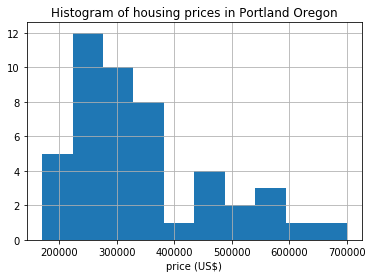

In [25]:
data.hist(column='price')
plt.title('Histogram of housing prices in Portland Oregon')
plt.xlabel('price (US$)')

Text(0,0.5,'price (US$)')

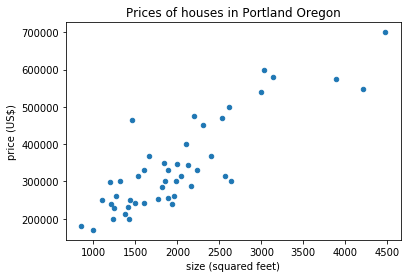

In [20]:
data.plot.scatter(x='size', y='price')
plt.title('Prices of houses in Portland Oregon')
plt.xlabel('size (squared feet)')
plt.ylabel('price (US$)')

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['size']], data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Voor matrix berekeningen maken we gebruik van de Python library numpy. Numpy maakt het eenvoudig om transposes en inverses te maken. We kunnen met de methode `as_matrix` een DataFrame van Pandas omzetten naar een numpy matrix.

In [31]:
lr.intercept_, lr.coef_

(71270.492448729114, array([ 134.52528772]))

Text(0.5,0,'$\\theta_1$')

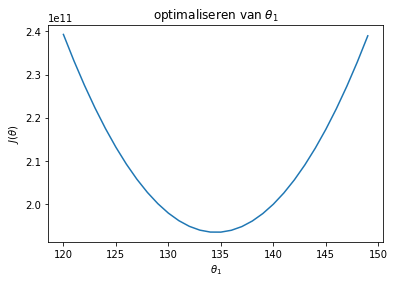

In [64]:
data['bias'] = 1
X = np.matrix(data[['bias', 'size']])
y = np.matrix(data[['price']])
costs = []
for rico in range(120,150):
    theta[1] = rico
    yh = X * theta
    d = yh - y
    j = d.T * d
    costs.append(j[0,0])
    
plt.plot(range(120,150), costs)
plt.title(r'optimaliseren van $\theta_1$')
plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'$\theta_1$')

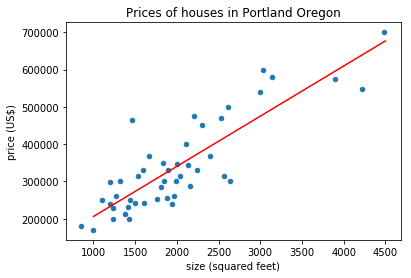

In [35]:
import numpy as np
data.plot.scatter(x='size', y='price')
plt.title('Prices of houses in Portland Oregon')
plt.xlabel('size (squared feet)')
plt.ylabel('price (US$)')
line_x = np.matrix([[1, 1000], [1 ,4500]]) # 1 in de eerste kolom is de bias
theta = np.matrix([lr.intercept_, lr.coef_[0]]).T
line_y = line_x * theta
plt.plot(line_x[:, 1], line_y, '-', color='red')

In [38]:
data[['size', 'price']]

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900
5,1985,299900
6,1534,314900
7,1427,198999
8,1380,212000
9,1494,242500


In [39]:
data.price.sum()/len(data)

340412.6595744681